# ARIMA

Sử dụng mô hình dữ liệu chuỗi thời gian ARIMA, dựa vào giá đóng cửa của cổ phiếu trong quá khứ để phản ánh diễn biến giá cổ phiếu trong tương lai. Mô hình **ARIMA – Autoregressive Intergrated Moving Average** là mô hình được sử dụng để phân tích thống kê dữ liệu chuỗi thời gian (Time-series), mô hình này giúp chúng ta phân tích và dự đoán xu hướng trong tương lai. Phương pháp phân tích này thể hiện mối quan hệ giữa giá trị quá khứ được quan sát cho phép dự đoán giá trị tương lai trong ngắn hạn. Phương pháp này gồm ba tham số:
-	*AR (auto regression):* tự hồi quy. (tham số p)
-	*MA (moving average):* trung bình trượt. (tham số d)
-	*I (intergrated):* kết hợp. (tham số q)

Mô hình ARIMA là mô hình hồi quy kết hợp trung bình trượt được đặc tả qua 3 tham số ARIMA (p, d, q) và biểu diễn phương trình hồi quy tuyến tính đa biến. Để sử dụng ARIMA gồm bốn quy trình:
-	Kiểm tra xác nhận tính dừng của dữ liệu (`stationary`): sử dụng làm để xác định tham số d.
-	Ước tính tham số: mô hình ARIMA sử dụng các tham số p, d, q. Trong quá trình ước lượng tham số cần chú ý đến cách xác định p và q.
-	Kiểm tra: đảm bảo mô hình được xác định chính xác và phù hợp với dữ liệu.
-	Dự báo: sử dụng mô hình ARIMA để dự đoán xu hướng tương lai.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error 
import statsmodels.api as sm
import itertools
import warnings
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
warnings.filterwarnings("ignore")

## Kiểm định tính dừng của dữ liệu.

Hầu hết các chuỗi thời gian đều không dừng, và các thành phần AR và MA của mô hình ARIMA chỉ liên quan đến các chuỗi thời gian dừng. Quy trình ngẫu nhiên của giá cổ phiếu được xem là dừng nếu trung bình và phương sai của quá trình không thay đổi theo thời gian và giá đồng phương sai giữa hai thòi đoạn chỉ phụ thuộc vào khoảng cách độ trễ về thời gian giữa các giai đoạn này chứ không phụ thuộc vào thời điểm thực tế mà đồng phương sai được tính. Do đó để nhận diện mô hình ARIMA cần thực hiện kiểm định tính dừng dựa vào kiểm định Dickey – Fuller.



` d (Thứ tự sai phân): Số lần sai phân được áp dụng để làm cho chuỗi thời gian có tính dừng. `

In [2]:
df = pd.read_csv('stock_data_output/VN30.csv')
df.drop(columns= 'Unnamed: 0', inplace= True)
df.set_index('Date', inplace= True)
df.index.name = None
df.head()

,AGR,BID,VCB,CTG
2017-01-03,2380,9800,23210,9970
2017-01-04,2290,9990,23050,10160
2017-01-05,2330,9960,23150,10220
2017-01-06,2320,10180,23610,10310
2017-01-09,2350,10480,24110,10590


In [3]:
for col in df.columns:
    result = adfuller(df[col])
    print('{} stock ADF Statistic: %f'.format(col) % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

AGR stock ADF Statistic: -0.912477
p-value: 0.783836
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
BID stock ADF Statistic: -1.114816
p-value: 0.709127
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
VCB stock ADF Statistic: -0.682688
p-value: 0.851183
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
CTG stock ADF Statistic: -1.280243
p-value: 0.638162
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


Sử dụng thư viện Statsmodel của Python để thực hiện kiểm định Dickey - Fuller. Ở đây có thể thấy rằng p-values > 0.05, điều này có nghĩa là giả thuyết dữ liệu có tính dừng bị bác bỏ và sẽ coi chuỗi dữ liệu này là chuỗi không dừng. 

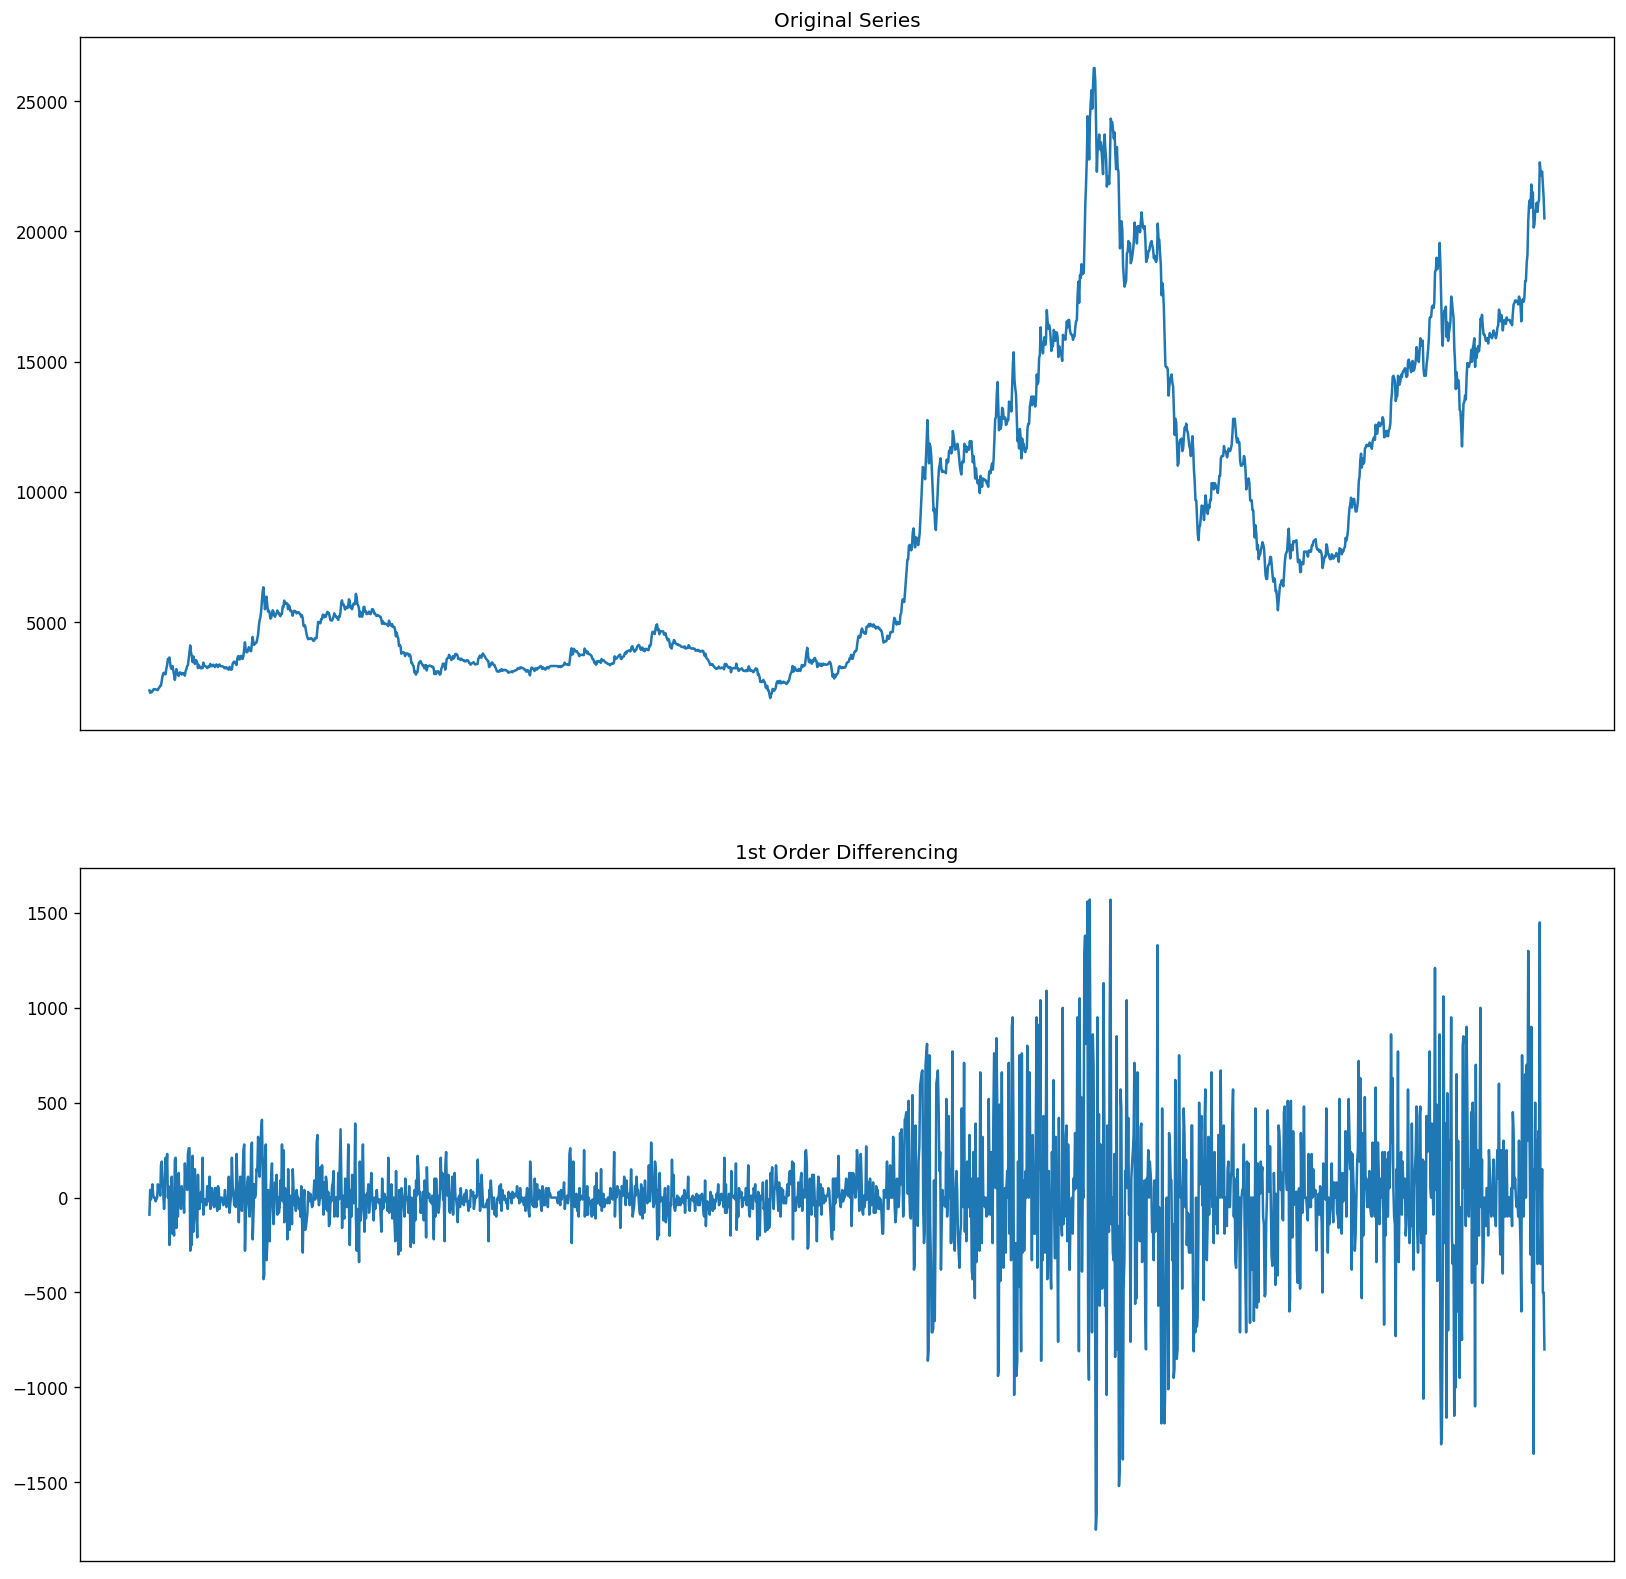

In [4]:
# Original Series
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(df.AGR); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(df.AGR.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
fig.set_size_inches(16.5, 16.5)

In [5]:
for col in df.columns:
    result = adfuller(df[col].diff().dropna())
    print('{} stock ADF Statistic: %f'.format(col) % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

AGR stock ADF Statistic: -7.777377
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
BID stock ADF Statistic: -44.178811
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
VCB stock ADF Statistic: -26.049513
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
CTG stock ADF Statistic: -44.427516
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


## Tìm trọng số của mô hình `ARIMA(p,d,q)` sao cho AIC nhỏ nhất.

`AIC (Akaike Information Criterion)`
- Thước đo định lượng mức độ phù hợp của mô hình với dữ liệu.
- Giá trị AIC thấp hơn cho thấy mô hình tốt hơn.
- Chúng tôi thường chọn mô hình ARIMA tốt nhất bằng cách so sánh điểm AIC cho các kết hợp tham số khác nhau. Quá trình này bao gồm việc điều chỉnh các mô hình ARIMA cho các giá trị p và q khác nhau và chọn mô hình có AIC thấp nhất.

In [6]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [7]:
minPar = (0,0,0)
minParS = (0,0,0,0)
minAIC = 10**9

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df.AGR,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            if minAIC > results.aic:
                minPar = param
                minParS = param_seasonal
                minAIC = results.AIC

        except:
            continue

In [8]:
print("Lowest AIC value with (p, d, q) = {}".format(minAIC, minPar))

Lowest AIC value with (p, d, q) = 1000000000


## Chạy mô hình, đánh giá độ chính xác của các tham số trong ARIMA và dự báo cho ngày tiếp theo.

In [9]:
plt.style.use('fivethirtyeight')

In [10]:
def one_day(stock):
    mod = sm.tsa.statespace.SARIMAX(df[stock],
                                    order=(1, 1, 1),
                                    seasonal_order=(1, 1, 1, 12),
                                    enforce_stationarity=True,
                                    enforce_invertibility=False)

    results = mod.fit()

    return results

In [11]:
stock_predict = []
for stock in df.columns:
    stock_predict.append(one_day(stock))

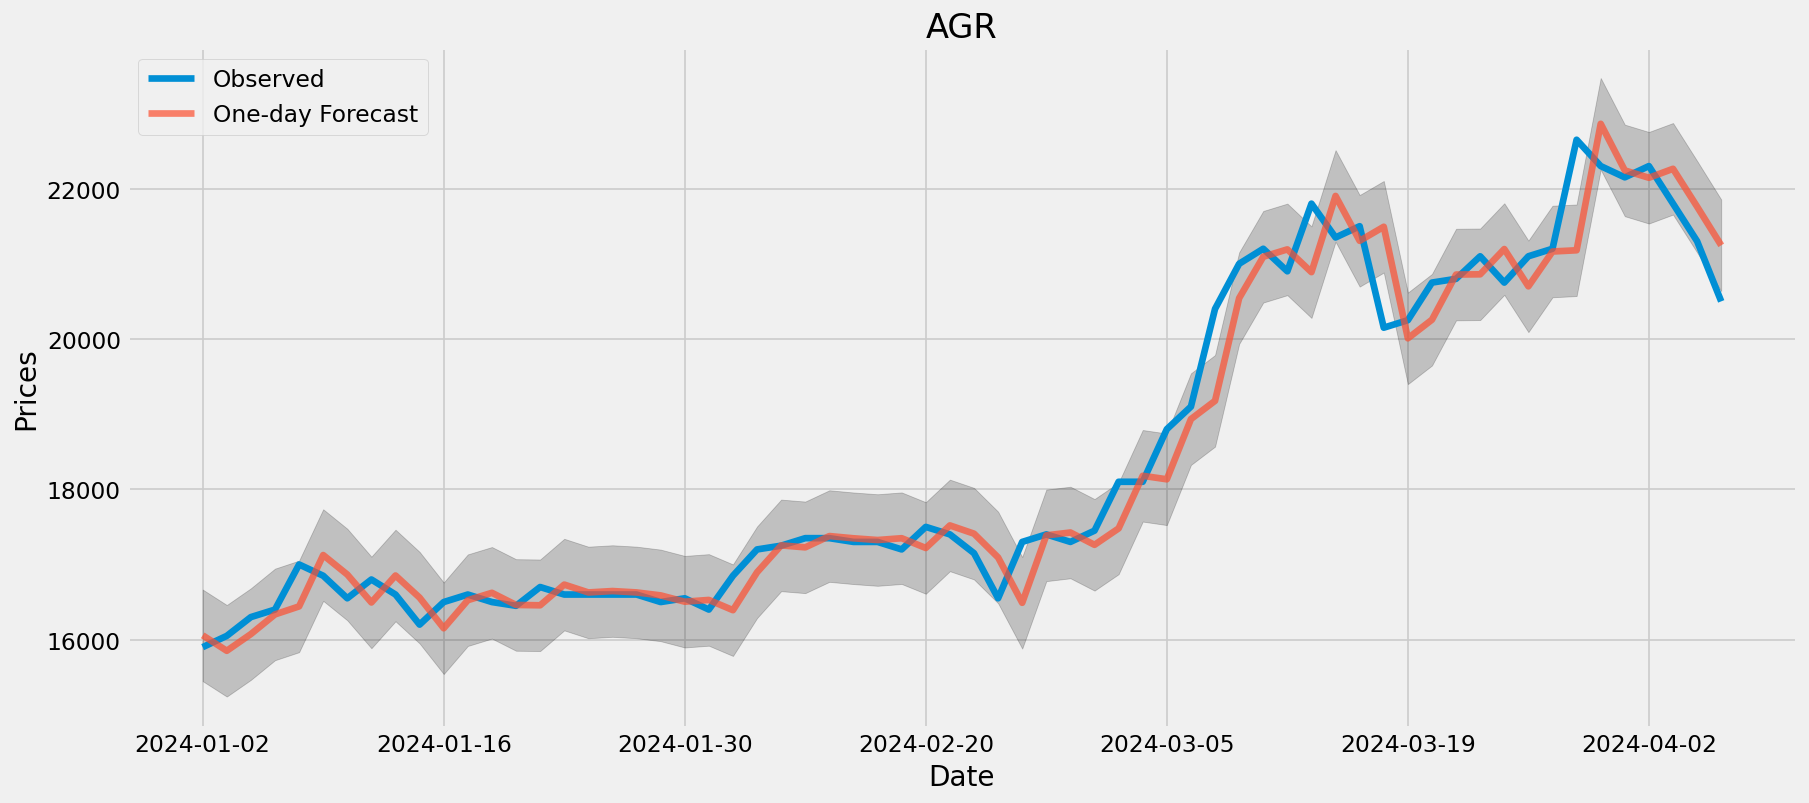

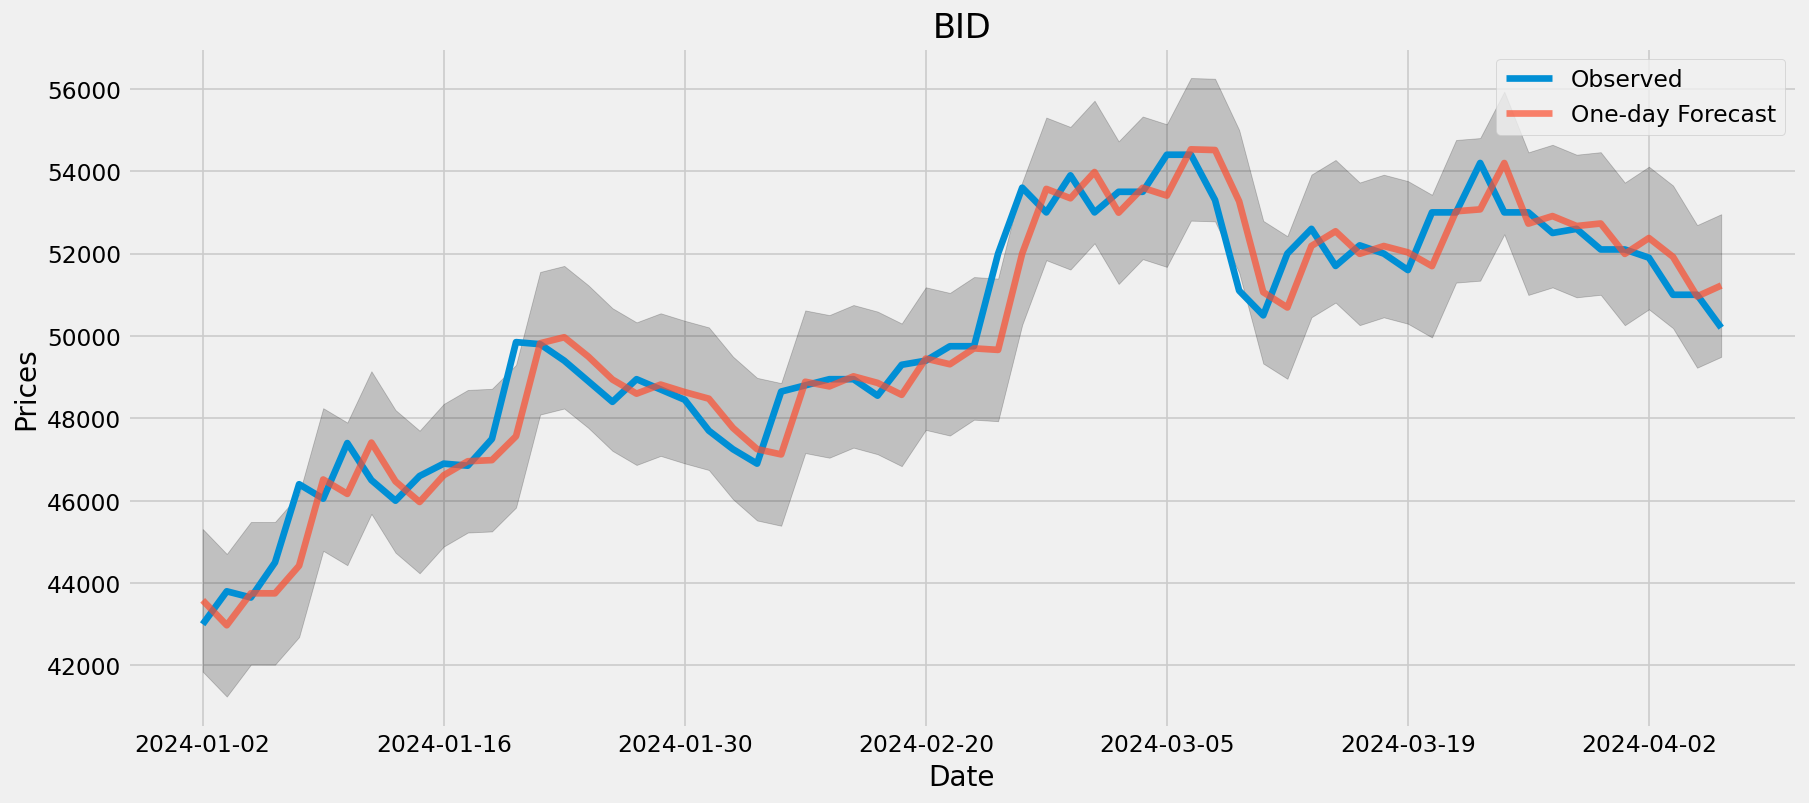

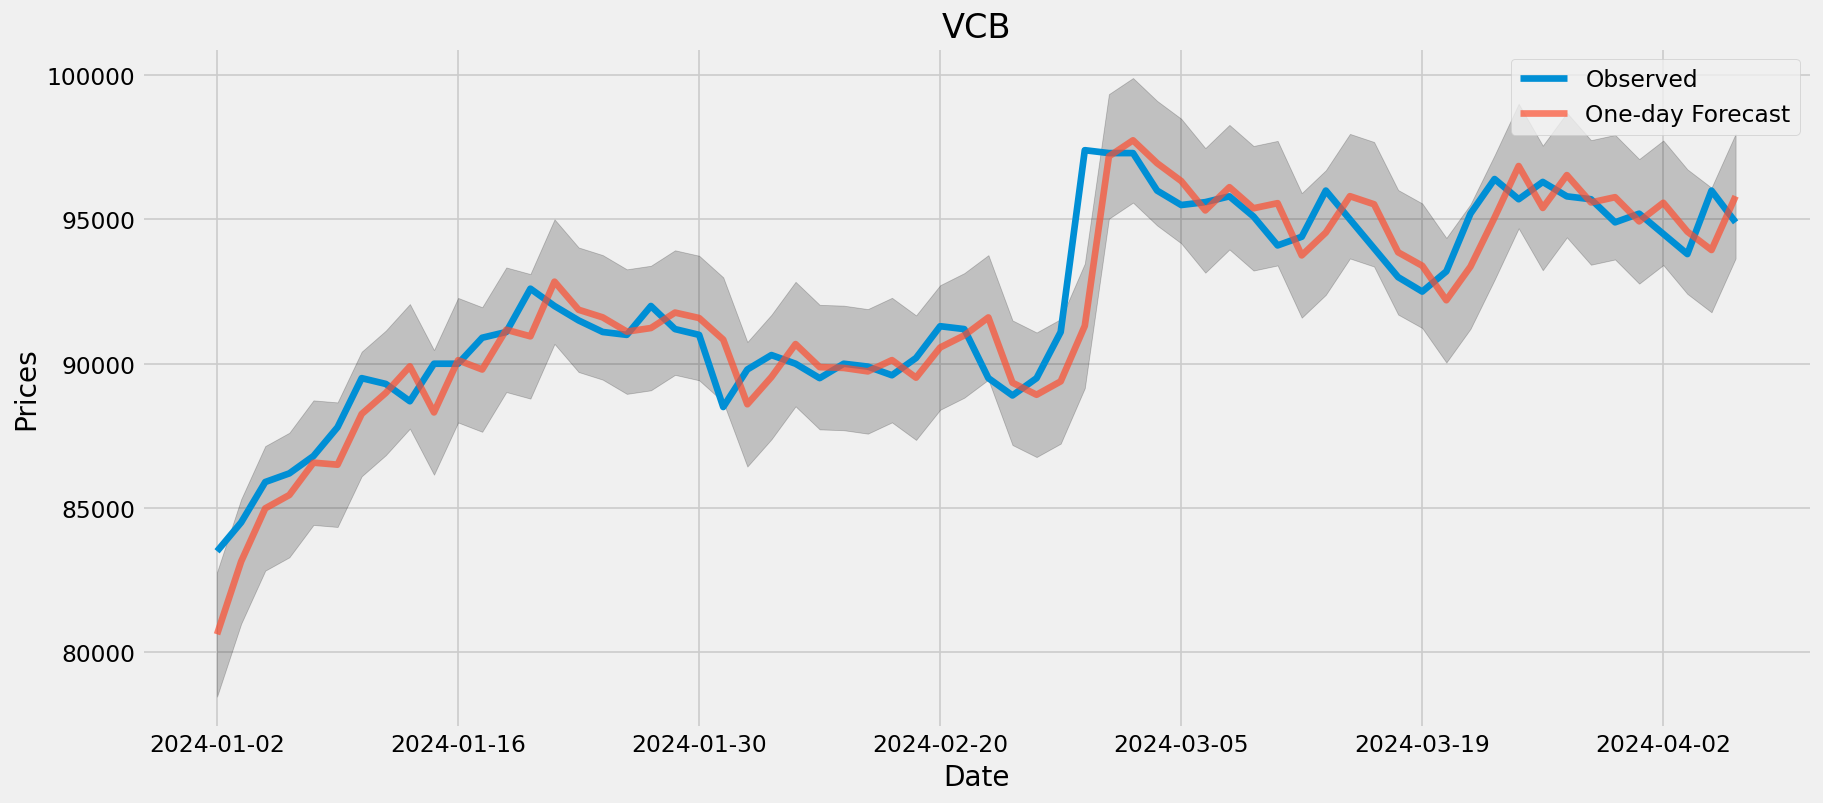

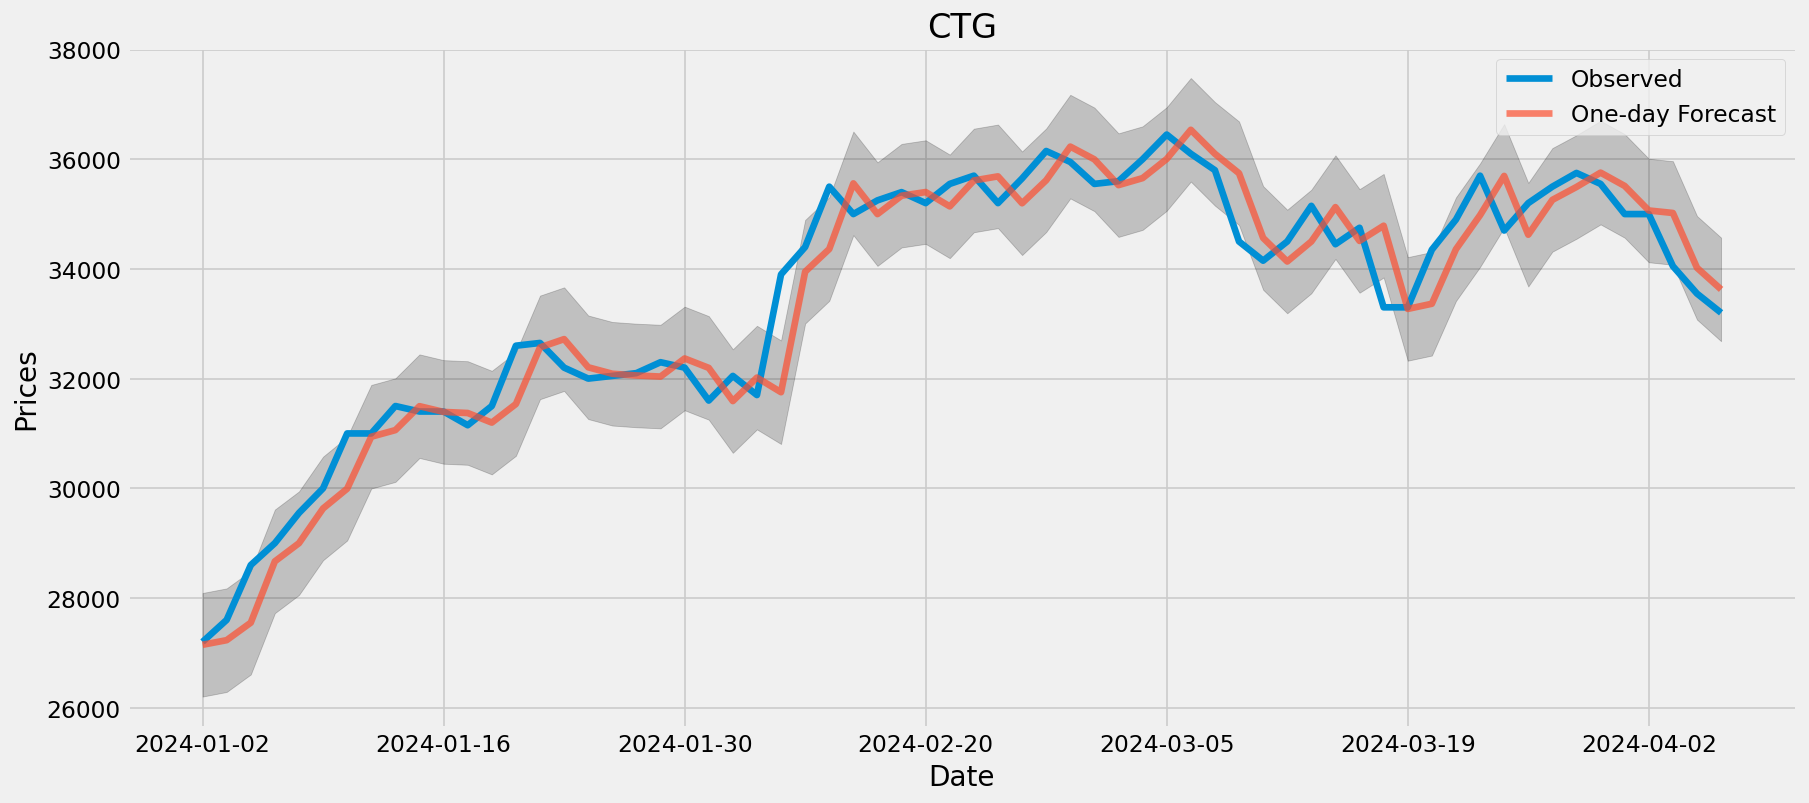

In [12]:
for i, stock in enumerate(df.columns):
    results = stock_predict[i]

    pred = results.get_prediction(start='2024-01-02', dynamic=False, full_results=True)
    pred_ci = pred.conf_int()

    ax = df[stock]['2024':].plot(label='Observed', figsize=(16,7))
    pred_plot = pred.predicted_mean
    pred_plot.plot(ax=ax, label='One-day Forecast', alpha=.7)

    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_title(stock)
    ax.set_xlabel('Date')
    ax.set_ylabel('Prices')
    plt.legend()
    plt.show()

In [13]:
def ARIMA_pre(stock):
    train = df[stock]

    # Sử dụng mô hình ARIMA
    history = [x for x in train]

    model = ARIMA(history, order= (1,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()       
    yhat = output[0]

    return yhat

In [14]:
for stock in df.columns:
    print("Next day {} predict: {}".format(stock, ARIMA_pre(stock)))

Next day AGR predict: 20397.875750440297
Next day BID predict: 50229.02049834272
Next day VCB predict: 94901.37484936704
Next day CTG predict: 33221.522715319574


### Sử dụng mô hình để dự báo xu hướng của mã trong 3 tháng tới.

In [15]:
def Forcast(stock):
    mod = sm.tsa.statespace.SARIMAX(df[stock][:'2024-01-02'],
                                    order=(1, 1, 1),
                                    seasonal_order=(1, 1, 1, 12),
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

    return mod.fit()
    

In [16]:
def plot_forcast(stock, results, steps):
    pred_uc = results.get_forecast(steps)

    # Get confidence intervals of forecasts
    pred_uci = pred_uc.conf_int()

    ax = df[stock].plot(label='Observed', figsize=(16, 7))
    pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
    ax.fill_between(pred_uci.index,
                    pred_uci.iloc[:, 0],
                    pred_uci.iloc[:, 1], color='k', alpha=.25)
    
    ax.set_xlabel('Date')
    ax.set_ylabel('Prices')
    plt.title(stock)
    plt.legend()
    plt.show()

In [17]:
stock_predict = []
for stock in df.columns:
    stock_predict.append(Forcast(stock))

In [1]:
for i, stock in enumerate(df.columns):
    plot_forcast(stock, stock_predict[i], 100)

NameError: name 'df' is not defined